In [1]:
import cxsystem2.neurodynlib as nd
from brian2.units import *
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

b2.codegen.target = 'numpy'

## Creating a neuron

In [2]:
x = nd.EifNeuron()  # try also with: EifNeuron, AdexNeuron, HodgkinHuxleyNeuron

In [3]:
x.get_neuron_equations()

dvm/dt = (DeltaT*gL*exp((-VT + vm)/DeltaT) + gL*(EL - vm))/C : volt (unless refractory)


## Changing neuron parameters

In [4]:
x.set_neuron_parameters(C=.6 * nfarad,
                        gL=50. * nsiemens,
                        EL=-62 * mV,
                        Vcut=-30. * mvolt,
                        VT=-45. * mvolt, 
                        DeltaT=2. * mvolt,
                        V_res=-60. * mvolt)

In [5]:
x.neuron_name = 'BC'


## f-I curves

Schwabe target function

In [6]:
def frFunc(input_currents,a,b,deltaI):
    y = np.piecewise(input_currents, [input_currents < deltaI, input_currents >= deltaI], 
                     [lambda input_currents: 0, 
                      lambda input_currents: a*(input_currents - deltaI) 
                      + b*(input_currents - deltaI)**2])
    return y

x.fI_target = {'a':131,'b':-28,'deltaI':0.7} # Target parameters

a = 200.06, b = -313.50, deltaI = 0.73


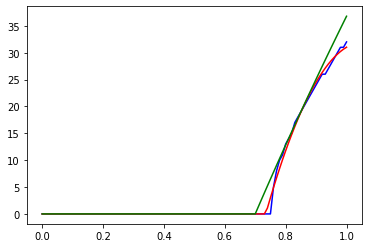

In [7]:
steps, counts = x.plot_fi_curve(plot=False)
steps_array = steps/nA
counts_array =  counts[:]
plt.plot(steps_array, counts_array, 'b-', label='f-I curve')
popt, pcov = curve_fit(frFunc, steps_array, counts_array, bounds=([0, -np.inf, 0], 
                                                                  [np.inf, np.inf, 1]))
plt.plot(steps_array, frFunc(steps_array, *popt), 'r-')
print(f'a = {popt[0]:.2f}, b = {popt[1]:.2f}, deltaI = {popt[2]:.2f}')
popt = np.array([x.fI_target['a'], x.fI_target['b'], x.fI_target['deltaI']])
plt.plot(steps_array, frFunc(steps_array, *popt), 'g-')
plt.show()

In [9]:
!cxvisualize --sampling-rate=50% --rasterplot-pdf \
    C:\Users\Simo\Laskenta\Models\SchwabeModel\build/ 20200103_0522225

arrayrun folder not found. Make sure the path is correct.
